In [101]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm
import ipywidgets as widgets
from IPython.display import Image
from random import choices


In [103]:
np.random.seed(16)

In [136]:
W, H = (256,256) #todo try a 3d erosion???
field_grid = np.meshgrid(range(W),range(H))
droplet_capacity = 0.5

(24480.00871639079, 2.2698934351222944e-05, 0.9999509133811011)

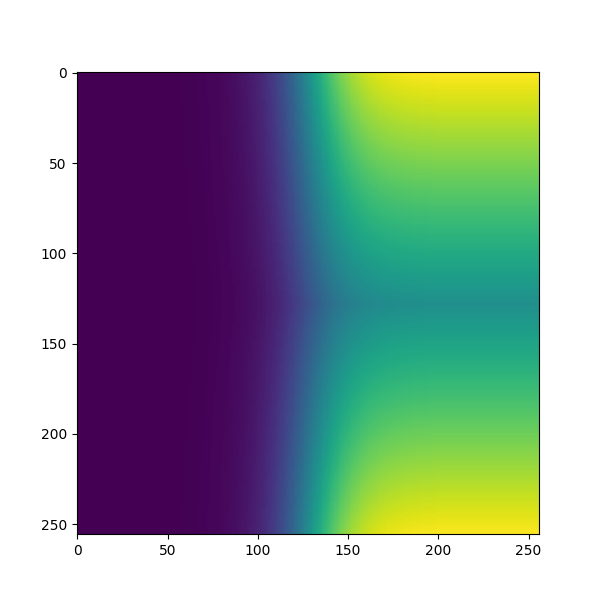

In [137]:
field = (np.tanh((field_grid[0]/W-0.5)*10)/2+0.5) * (np.abs(field_grid[1]/H-0.5)+0.5)
plt.figure(figsize=(6,6))
plt.imshow(field, interpolation='none',vmin=0,vmax=1)
np.sum(field), np.min(field), np.max(field)

In [138]:
#randomly choose of all directions where it goes downhill with a weighted rand. if there is no down but not up either, continue in last direction.

#when i figure out how to go arbitrary directions, have a momentum that decays.

#each droplet has a carrying capacity and picks up some fraction of the remaining capacity as it goes. When does it deposit tho. Maybe based on the difference in height.
#can't deposit to a higher state than the lowest neighbor. unless all are equal.
#all are NEVER equal. deposit material min(to the average of neighbors, some const) and move to the lowest neighbor.

In [139]:
for droplet in tqdm(range(int(1e5))):
    start_idx = (np.random.rand(2,)*(W,H)).astype(int)
    droplet_pos = start_idx
    droplet_load = 0
    log = []
    log.append(droplet_pos)
    
    for iteration in range(0,100):
        neighbors_idx = (np.tile(droplet_pos,(4,1)) + [[1,0],[0,1],[-1,0],[0,-1]])
        neighbors_idx = np.clip(neighbors_idx, 0, [W-1,H-1])
        
        d_neighbors = field[tuple(neighbors_idx.T)] - field[tuple(droplet_pos)]
        lower_neighbors = d_neighbors < -1e-9
        lower_neighbors_idx = neighbors_idx[lower_neighbors]
        d_lower_neighbors = d_neighbors[lower_neighbors] - 0.01

        if(len(d_lower_neighbors) == 0):
            break

        prev_pos = droplet_pos
        
        droplet_pos = choices(population=lower_neighbors_idx,weights=-d_lower_neighbors,k=1)[0]
        
        droplet_capacity = np.minimum(field[tuple(prev_pos)]-field[tuple(droplet_pos)]/100,0.01)
        dm = np.maximum((droplet_capacity-droplet_load)/10,-droplet_load)
 
        field[tuple(droplet_pos)] -= dm
        droplet_load += dm
        
        
        log.append(droplet_pos)
    field[tuple(droplet_pos)] += droplet_load
    log = np.array(log)

100%|██████████| 100000/100000 [01:50<00:00, 902.37it/s]


(24480.00871639079, 2.2698934351222944e-05, 0.9999509133811011)

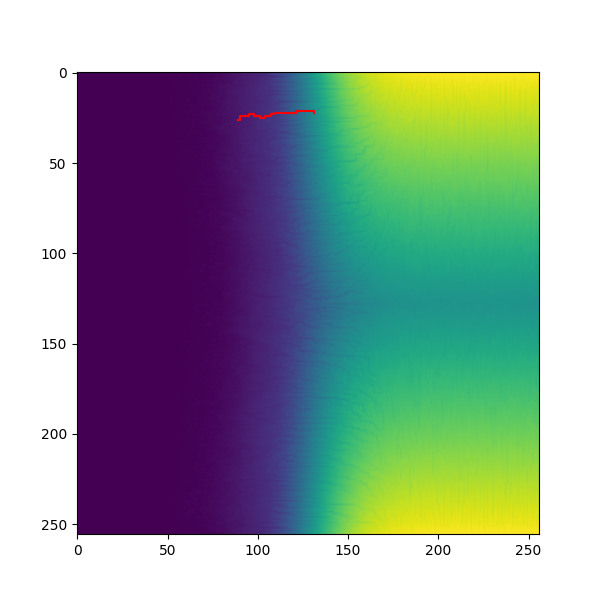

In [140]:
plt.figure(figsize=(6,6))
plt.imshow(field, vmin=0,vmax=1)
plt.plot(log[:,1], log[:,0], 'red')
np.sum(field), np.min(field), np.max(field)

In [141]:
#todo: add momentum (make it influence the weights?); start with a different noise, write it all into a timelapse

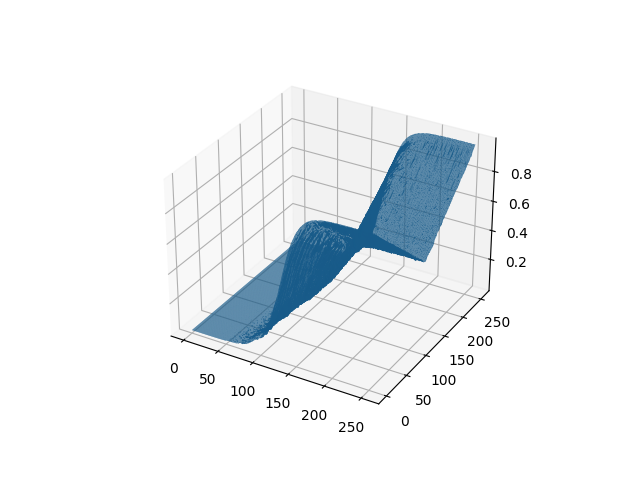

In [142]:


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y = field_grid

Z = field

# Plot a basic wireframe.
ax.plot_surface(X, Y, Z, rstride=1, cstride=1)

plt.show()

